In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# Load the image
image = cv2.imread('../IMAGES/truck.bmp', cv2.IMREAD_GRAYSCALE)

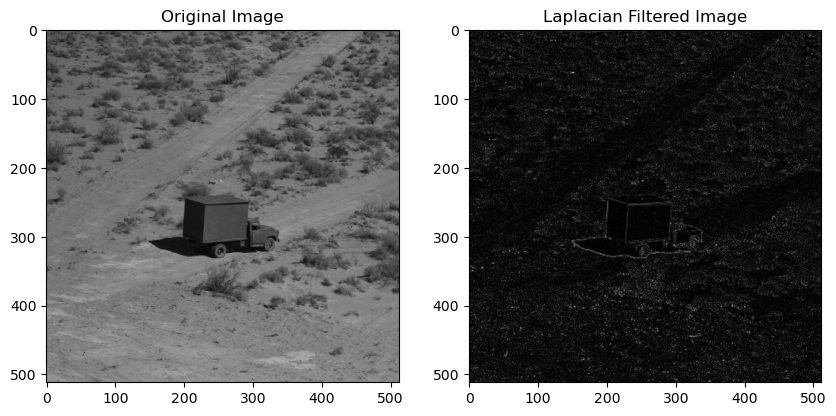

In [14]:
# Apply the Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convert back to uint8
laplacian = np.uint8(np.absolute(laplacian))

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian Filtered Image')
plt.show()


In [16]:
def apply_laplacian_filter(image):
    # Define the Laplacian kernel
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])

    # Get the dimensions of the image
    rows, cols = image.shape

    # Create an empty image to store the output
    output_image = np.zeros((rows, cols), dtype=np.float64)

    # Pad the image with zeros on all sides
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    # Convolve the image with the kernel
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            # Extract the region of interest
            region = padded_image[i-1:i+2, j-1:j+2]
            # Apply the kernel to the region
            output_image[i-1, j-1] = np.sum(region * kernel)

    # Normalize the output image to the range [0, 255]
    output_image = np.absolute(output_image)
    output_image = (output_image / np.max(output_image)) * 255
    output_image = np.uint8(output_image)

    return output_image

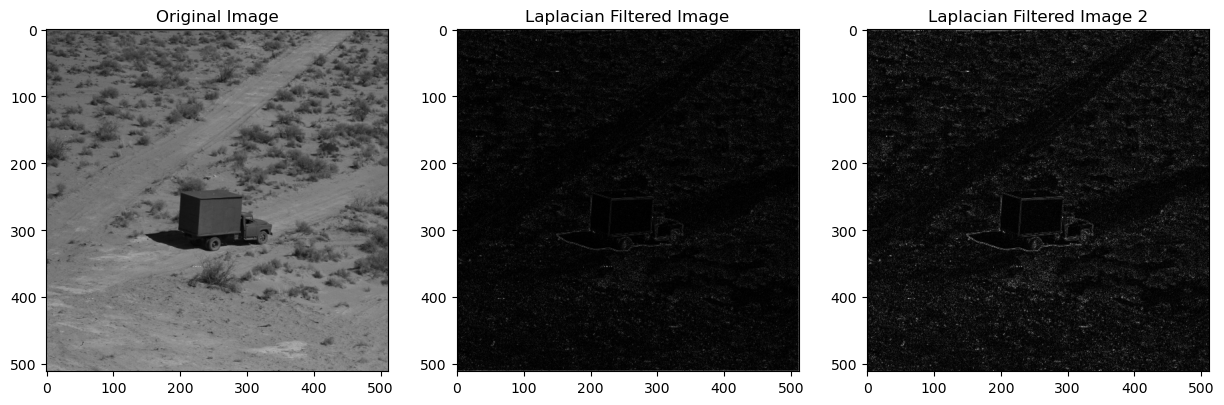

In [24]:
# Apply the Laplacian filter
laplacian_filtered_image = apply_laplacian_filter(image)

# Display the original and filtered images
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filtered Image')

plt.subplot(1, 3, 3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filtered Image 2')
plt.show()